# Computational Intelligence Project 1
9831058 Ali Moradzade

# Doing some imports

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

## Getting the data

In [3]:
# !gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
# !tar xzf CIFAR10.tar.gz

# 1. Reading From Dataset

In [4]:
my_data_dir = 'CIFAR10/'

In [5]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['train', 'test']

In [6]:
test_path = my_data_dir + 'test/'
train_path = my_data_dir + 'train/'

In [7]:
os.listdir(test_path)

['deer',
 'frog',
 'dog',
 'cat',
 'ship',
 'horse',
 'automobile',
 'airplane',
 'truck',
 'bird']

In [8]:
os.listdir(train_path)

['deer',
 'frog',
 'dog',
 'cat',
 'ship',
 'horse',
 'automobile',
 'airplane',
 'truck',
 'bird']

### Visualizing the Data

In [9]:
selected_types = ['airplane', 'automobile', 'bird', 'cat']

In [1]:
# os.listdir(train_path + selected_types[0])

In [11]:
os.listdir(train_path + selected_types[0])[0]

'0025.jpg'

In [12]:
airplane_cell = train_path + selected_types[0] + '/' + os.listdir(train_path + selected_types[0])[0]

In [13]:
airplane_img = imread(airplane_cell)

In [14]:
airplane_img.shape

(32, 32, 3)

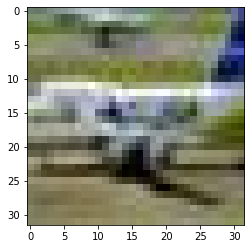

In [15]:
plt.imshow(airplane_img)

In [16]:
airplane_img.shape

(32, 32, 3)

**Let's check how many images there are.**

In [17]:
for selecte_type in selected_types:
    print(selecte_type + ':', len(os.listdir(train_path + selecte_type)))

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000


In [18]:
for selecte_type in selected_types:
    print(selecte_type + ':', len(os.listdir(test_path + selecte_type)))

airplane: 1000
automobile: 1000
bird: 1000
cat: 1000


In [19]:
image_shape = (32, 32, 3)

## Reading all images into numpy array

### Reading train images:

In [20]:
X_train = []

for selected_type in selected_types:
    list_of_images = os.listdir(train_path + selected_type)
    for image in list_of_images:
        X_train.append(imread(train_path + selected_type + '/' + image))

In [21]:
X_train = np.array(X_train)

In [22]:
X_train.shape

(20000, 32, 32, 3)

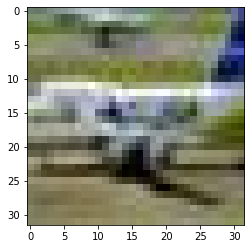

In [23]:
plt.imshow(X_train[0])

Making y_train, based on seleted types:

1. airplane
2. automobile
3. bird
4. cat

In [24]:
y_train = np.concatenate([np.zeros(5000),1 * np.ones(5000),2 * np.ones(5000),3 * np.ones(5000)])

In [25]:
y_train.shape

(20000,)

### Reading test images:

In [26]:
X_test = []

for selected_type in selected_types:
    list_of_images = os.listdir(test_path + selected_type)
    for image in list_of_images:
        X_test.append(imread(test_path + selected_type + '/' + image))

In [27]:
X_test = np.array(X_test)

In [28]:
X_test.shape

(4000, 32, 32, 3)

Making y_train, based on seleted types:

0. airplane
1. automobile
2. bird
3. cat

In [29]:
y_test = np.concatenate([np.zeros(1000),1 * np.ones(1000),2 * np.ones(1000),3 * np.ones(1000)])

In [30]:
y_test.shape

(4000,)

# PreProcessing

## Making grayscale 

In [31]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    return gray

In [32]:
X_train = rgb2gray(X_train)

In [33]:
X_test = rgb2gray(X_test)

In [34]:
X_train.shape

(20000, 32, 32)

## Normalizing

In [35]:
X_train = X_train / 225

In [36]:
X_test = X_test / 255

## Flattening

In [37]:
X_train = X_train.reshape(-1, 1024)

In [38]:
X_test = X_test.reshape(-1, 1024)

In [39]:
X_train.shape

(20000, 1024)

## Labels

In [40]:
from tensorflow.keras.utils import to_categorical

2022-04-24 01:15:50.448201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 01:15:50.448278: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [41]:
y_train.shape

(20000,)

In [42]:
y_cat_train = to_categorical(y_train, 4)
y_cat_test = to_categorical(y_test, 4)

In [43]:
y_cat_train.shape

(20000, 4)

In [44]:
y_cat_train[0]

array([1., 0., 0., 0.], dtype=float32)

## Change the format to use with our algorithms

In [45]:
train_set = []

for i in range(X_train.shape[0]):
    train_set.append((X_train[i].reshape(1024, 1), y_cat_train[i].reshape(4, 1)))

In [46]:
test_set = []

for i in range(X_test.shape[0]):
    test_set.append((X_test[i].reshape(1024, 1), y_cat_test[i].reshape(4, 1)))

# 2. Feedforward
As we all know, in order to calculate output in a neural network based on inputs, we must apply the following formula on each layer:  
$$a^{(L+1)} = \sigma(W^{(L+1)}× a^{(L)} + b^{(L+1)})$$

Therefore in implementation, for weights between layers, we assign a k×n matrix. Assume "k" is the number of neurons on the next layer, and "n" is the number of neurons on the current layer. As a result, the weights of a single neuron on the next layer are shown in each row of our matrix W.

This is a function like the feed forward. it calculates the activation functions.\
Then calculates how many of the predicted results were correct.\
*** This is used for train data ***

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

![title](layers.png)

In [48]:
NUMBER_OF_PIXELS = 32 * 32

In [49]:
W1 = np.random.normal(size=(16, NUMBER_OF_PIXELS))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

# Initialize b = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

In [50]:
number_of_correct_estimations = 0
total_numbers = 200

for train_data in train_set[:total_numbers]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1

print(f"Accuracy: {number_of_correct_estimations / total_numbers * 100}%")

Accuracy: 100.0%


## 3. Backpropagation
As we know, the learning process in a neural network is equivalent to minimize the cost function  
$$Cost =\sum_{j=0}^{n_{L} - 1} (a_{j}^{(L)} - y_{j})^2$$
That is done with the help of Gradient Descent. To do that, we take a partial derivative of the cost function with respect to all the parameters to make the Gradient vector.
$$(W, b) = (W, b) - \alpha\nabla Cost$$
We take the derivatives with the help of backpropagation.

In [51]:
# Hyperparameters
batch_size = 16
learning_rate = 0.3
number_of_epochs = 10

### How to use backpropagation?
Regarding we have four layers (one input layer, one output layer, and two hidden layers), if we want to use backpropagation, at first, we have to define what we are dealing with.  
Let us suppose we name our layers from 0 to 3, then we have:
$$Cost =\sum_{j=0}^{9} (a_{j}^{(L)} - y_{j})^2$$
Each neuron at the last layer is equal to:
$$a_{j}^{(3)} = \sigma(z_{j}^{(3)})$$
And $z_{j}^{(3)}$ is equal to:
$$z_{j}^{(3)} = \sum_{j=0}^{9} w_{jk}^{(3)}a_{k}^{(2)} + b_{j}^{(2)}$$
### The last layer
##### Weight
If we apply the chain rule, we can reach to the following formula:  
$$\displaystyle \frac{\partial Cost}{\partial w_{jk}^{(3)}} = \displaystyle \frac{\partial Cost}{\partial a_{j}^{(3)}} \times \displaystyle \frac{\partial a_{j}^{(3)}}{\partial z_{j}^{(3)}} \times \displaystyle \frac{\partial z_{j}^{(3)}}{\partial w_{jk}^{(3)}} $$

$$\displaystyle \frac{\partial Cost}{\partial w_{jk}^{(3)}} = 2(a_{j}^{(3)} - y_{j}) \times \sigma^{'}(z_{j}^{(3)})\times a_{k}^{(2)}$$

##### Bias
$$\displaystyle \frac{\partial Cost}{\partial b_{j}^{(3)}} = \displaystyle \frac{\partial Cost}{\partial a_{j}^{(3)}} \times \displaystyle \frac{\partial a_{j}^{(3)}}{\partial z_{j}^{(3)}} \times \displaystyle \frac{\partial z_{j}^{(3)}}{\partial b_{j}^{(3)}} $$

$$\displaystyle \frac{\partial Cost}{\partial b_{j}^{(3)}} = 2(a_{j}^{(3)} - y_{j}) \times \sigma^{'}(z_{j}^{(3)})\times 1$$

##### Activation
We also need to calculate partial derivatives with respect to the activation output of the previous layer. It helps us for backpropagation as we see further.  
$$\displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} = \sum_{j=0}^{9} \displaystyle \frac{\partial Cost}{\partial a_{j}^{(3)}} \times \displaystyle \frac{\partial a_{j}^{(3)}}{\partial z_{j}^{(3)}} \times \displaystyle \frac{\partial z_{j}^{(3)}}{\partial a_{k}^{(2)}} $$

$$\displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} = \sum_{j=0}^{9} (2(a_{j}^{(3)} - y_{j}) \times \sigma^{'}(z_{j}^{(3)})\times w_{jk}^{(3)}) $$

### 3rd layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial w_{km}^{(2)}} = \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \displaystyle \frac{\partial a_{k}^{(2)}}{\partial z_{k}^{(2)}} \times \displaystyle \frac{\partial z_{k}^{(2)}}{\partial w_{km}^{(2)}} $$

$$\displaystyle \frac{\partial Cost}{\partial w_{km}^{(2)}} =  \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \sigma^{'}(z_{k}^{(2)})\times a_{m}^{(1)}$$

##### Bias
$$\displaystyle \frac{\partial Cost}{\partial b_{k}^{(2)}} = \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \displaystyle \frac{\partial a_{k}^{(2)}}{\partial z_{k}^{(2)}} \times \displaystyle \frac{\partial z_{k}^{(2)}}{\partial b_{k}^{(2)}} $$

$$\displaystyle \frac{\partial Cost}{\partial b_{k}^{(2)}} = \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \sigma^{'}(z_{k}^{(2)})\times 1$$

##### Activation
$$\displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} = \sum_{k=0}^{15} \displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \displaystyle \frac{\partial a_{k}^{(2)}}{\partial z_{k}^{(2)}} \times \displaystyle \frac{\partial z_{k}^{(2)}}{\partial a_{m}^{(1)}} $$

$$\displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} = \sum_{k=0}^{15} (\displaystyle \frac{\partial Cost}{\partial a_{k}^{(2)}} \times \sigma^{'}(z_{k}^{(2)})\times w_{km}^{(2)}) $$

### 2nd layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial w_{mv}^{(1)}} = \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \displaystyle \frac{\partial a_{m}^{(1)}}{\partial z_{m}^{(1)}} \times \displaystyle \frac{\partial z_{m}^{(1)}}{\partial w_{mv}^{(1)}} $$

$$\displaystyle \frac{\partial Cost}{\partial w_{mv}^{(1)}} =  \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \sigma^{'}(z_{m}^{(1)})\timesa_{v}^{(0)}$$

##### Bias
$$\displaystyle \frac{\partial Cost}{\partial b_{m}^{(1)}} = \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \displaystyle \frac{\partial a_{m}^{(1)}}{\partial z_{m}^{(1)}} \times \displaystyle \frac{\partial z_{m}^{(1)}}{\partial b_{m}^{(1)}} $$

$$\displaystyle \frac{\partial Cost}{\partial b_{m}^{(1)}} = \displaystyle \frac{\partial Cost}{\partial a_{m}^{(1)}} \times \sigma^{'}(z_{m}^{(1)})\times 1$$

In [52]:
# %%time
total_costs = []
# Initialize W with random normal distribution for each layer.
W1 = np.random.normal(size=(16, NUMBER_OF_PIXELS))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

# Initialize b = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

for epoch in range(number_of_epochs):
    batches = [train_set[x:x+batch_size] for x in range(0, 100, batch_size)]
    for batch in batches:
        # allocate grad_W matrix for each layer
        grad_W1 = np.zeros((16, NUMBER_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        # allocate grad_b for each layer
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # compute the output (image is equal to a0)
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
            # bias
            for j in range(grad_b3.shape[0]):
                    grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            for k in range(16):
                for j in range(4):
                    delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
            # weight
            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += delta_3[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            # bias
            for k in range(grad_b2.shape[0]):
                    grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
            # weight
            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += delta_2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * image[v, 0]
                    
            # bias
            for m in range(grad_b1.shape[0]):
                    grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:100]:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 100
    total_costs.append(cost)    

Accuracy: 3.0%


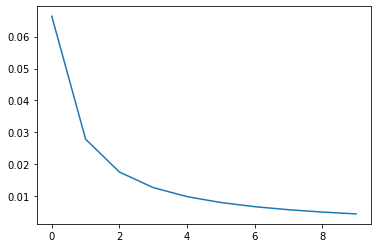

In [53]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)

for train_data in train_set[:100]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / 100}%")

# 4. Vectorization
Because of the long execution time, we've only dealt on 100 first pictures so far. We use vectorization to solve this problem. It implies that we use matrix operations instead of for loops to measure each entry of matrices separately.

As a result, the processing time would be significantly reduced. The explanation for this is that matrix operations can run in parallel on multi-core CPUs. Furthermore, today's processors have instructions for working with large vector data, which will be much more effective.

We have implemented the second section (Feedforward) in a vectorized way. Now we're attempting to do the same thing with backpropagation.
___

In vectorized notiation, we have:
$$Cost =(\overrightarrow{a}^{(3)} - \overrightarrow{y})^{T}(\overrightarrow{a}^{(3)} - \overrightarrow{y})$$
The activation vector at the last layer is equal to:
$$\overrightarrow{a}^{(3)} = \sigma(\overrightarrow{z}^{(3)})$$
And $\overrightarrow{z}^{(3)}$ is equal to:
$$\overrightarrow{z}^{(3)} = W^{(3)}\overrightarrow{a}^{(2)} + \overrightarrow{b}^{(2)}$$
### The last layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial W^{(3)}} = 2(\overrightarrow{a}^{(3)} - \overrightarrow{y})\overrightarrow{a}^{(3)}(1 - \overrightarrow{a}^{(3)}) \bullet \overrightarrow{a}^{(2)}$$
##### Bias
$$\displaystyle \frac{\partial Cost}{\partial \overrightarrow{b}^{(3)}} = 2 (\overrightarrow{a}^{(3)} - \overrightarrow{y}) \overrightarrow{a}^{(3)}(1 - \overrightarrow{a}^{(3)})$$
##### Activation
$$\displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}} = {W_{3}^{T}} (2(\overrightarrow{a}^{(3)} - \overrightarrow{y}) \overrightarrow{a}^{(3)}(1 - \overrightarrow{a}^{(3)})) $$

### 3rd Layer
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial W^{(2)}} = \displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}}\overrightarrow{a}^{(2)}(1 - \overrightarrow{a}^{(2)}) \bullet \overrightarrow{a}^{(1)}$$
##### Bias
$$\displaystyle \frac{\partial Cost}{\partial \overrightarrow{b}^{(2)}} = (\displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}})\overrightarrow{a}^{(2)}(1 - \overrightarrow{a}^{(2)})$$
##### Activation 
$$\displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(1)}} = {W_{2}^{T}} (\displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(2)}}) \overrightarrow{a}^{(2)}(1 - \overrightarrow{a}^{(2)})) $$

### 2nd
##### Weight
$$\displaystyle \frac{\partial Cost}{\partial W^{(1)}} = \displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(1)}}\overrightarrow{a}^{(1)}(1 - \overrightarrow{a}^{(1)}) \bullet \overrightarrow{a}^{(0)}$$
##### Bias
$$\displaystyle \frac{\partial Cost}{\partial \overrightarrow{b}^{(1)}} = (\displaystyle \frac{\partial Cost}{\partial \overrightarrow{a}^{(1)}})\overrightarrow{a}^{(1)}(1 - \overrightarrow{a}^{(1)})$$

In [54]:
number_of_epochs = 20

In [55]:
%%time

W1 = np.random.normal(size=(16, NUMBER_OF_PIXELS))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

# Initialize b = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_costs = []
batches = [train_set[x:x+batch_size] for x in range(0, 100, batch_size)]
for epoch in range(number_of_epochs):
    for batch in batches:
        # allocate grad_W matrix for each layer
        grad_W1 = np.zeros((16, NUMBER_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        # allocate grad_b for each layer
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # compute the output (image is equal to a0)
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # weight
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:100]:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 100
    total_costs.append(cost)    

CPU times: user 383 ms, sys: 5 µs, total: 383 ms
Wall time: 384 ms


Accuracy: 1.0


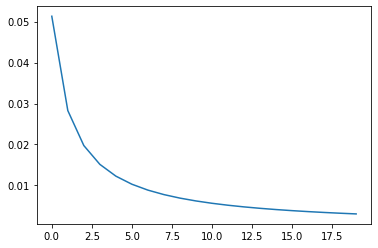

In [56]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
number_of_correct_estimations = 0
for train_data in train_set[:100]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / 100}")

# 5. Testing the model
We use all of our data (60k images) to learn our model now that we've optimized our implementation. Finally, we measure the model's accuracy using test results.

In [57]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 40

In [58]:
%%time

total_costs = []
# Initialize W with random normal distribution for each layer.
W1 = np.random.normal(size=(16, NUMBER_OF_PIXELS))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

# Initialize b = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

for epoch in range(number_of_epochs):
    np.random.shuffle(train_set)
    batches = [train_set[x:x+batch_size] for x in range(0, len(train_set), batch_size)]
    for batch in batches:
        # allocate grad_W matrix for each layer
        grad_W1 = np.zeros((16, NUMBER_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        # allocate grad_b for each layer
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # compute the output (image is equal to a0)
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # weight
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in train_set:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 100
    total_costs.append(cost)    

CPU times: user 1min 44s, sys: 0 ns, total: 1min 44s
Wall time: 1min 44s


Accuracy: 19.88%


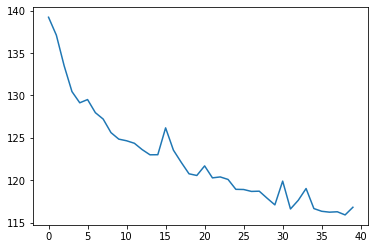

In [59]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
number_of_correct_estimations = 0
for test_data in test_set:
    a0 = test_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / 100}%")

# Optional Items 

## Part 1

### The Data

In [60]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [61]:
x_train.shape

(50000, 32, 32, 3)

In [62]:
x_train[0].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

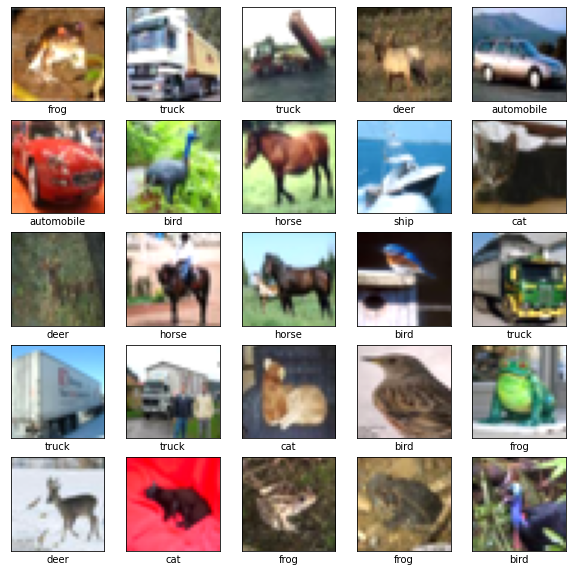

In [92]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### PreProcessing

In [65]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [66]:
x_train[0].shape

(32, 32, 3)

In [67]:
x_train.max()

255

In [68]:
x_train = x_train / 225

In [69]:
x_test = x_test / 255

In [70]:
x_train.shape

(50000, 32, 32, 3)

In [71]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [72]:
from tensorflow.keras.utils import to_categorical

In [73]:
y_train.shape

(50000, 1)

In [74]:
y_train[0]

array([6], dtype=uint8)

In [75]:
y_cat_train = to_categorical(y_train,10)

In [76]:
y_cat_train.shape

(50000, 10)

In [77]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [78]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [107]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile()

#### unfortunatly your model got 1 hour to run and i forgot to save the results :(, so i will use this model instead:

In [109]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dense_47 (Dense)            (None, 256)             

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [113]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 25s 15ms/step - loss: 1.5190 - accuracy: 0.4564 - val_loss: 1.4057 - val_accuracy: 0.5077
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1470 - accuracy: 0.5967 - val_loss: 1.2674 - val_accuracy: 0.5508
Epoch 3/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9907 - accuracy: 0.6548 - val_loss: 1.1330 - val_accuracy: 0.6074
Epoch 4/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8854 - accuracy: 0.6930 - val_loss: 1.0010 - val_accuracy: 0.6581
Epoch 5/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8048 - accuracy: 0.7218 - val_loss: 0.9917 - val_accuracy: 0.6659
Epoch 6/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7384 - accuracy: 0.7489 - val_loss: 0.9642 - val_accuracy: 0.6734
Epoch 7/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6884 - accuracy: 0.7664 - val_loss: 1.3691 -

In [114]:
losses = pd.DataFrame(model.history.history)

In [115]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.518961,0.45644,1.405738,0.5077
1,1.146975,0.59668,1.267413,0.5508
2,0.990683,0.65480,1.133041,0.6074
3,0.885444,0.69304,1.001009,0.6581
4,0.804798,0.72182,0.991717,0.6659


<AxesSubplot:>

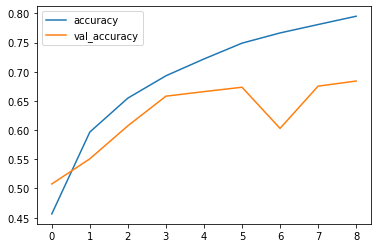

In [116]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

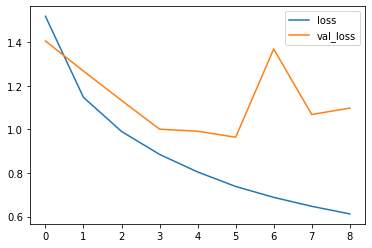

In [117]:
losses[['loss','val_loss']].plot()

In [118]:
model.metrics_names

['loss', 'accuracy']

In [119]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[1.0975652933120728, 0.6840000152587891]


In [120]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.83      0.78      0.81      1000
           2       0.60      0.56      0.58      1000
           3       0.58      0.41      0.48      1000
           4       0.54      0.76      0.63      1000
           5       0.64      0.52      0.58      1000
           6       0.86      0.66      0.75      1000
           7       0.65      0.78      0.71      1000
           8       0.83      0.75      0.79      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [122]:
confusion_matrix(y_test,predictions)

array([[795,  15,  40,   4,  39,   1,   1,  16,  53,  36],
       [ 37, 784,   8,   4,  11,   2,   6,   5,  18, 125],
       [ 76,   7, 556,  41, 139,  71,  27,  53,  14,  16],
       [ 39,  10,  83, 407, 137, 130,  34,  99,  22,  39],
       [ 29,   3,  46,  29, 760,  32,  17,  69,   7,   8],
       [ 24,   6,  84, 121,  82, 524,  11, 120,  11,  17],
       [ 15,  10,  57,  62, 113,  25, 663,  19,   7,  29],
       [ 21,   1,  28,  18,  96,  30,   1, 784,   4,  17],
       [ 97,  48,  13,   9,  13,   4,   4,  13, 753,  46],
       [ 46,  63,  10,  10,   7,   3,   3,  22,  22, 814]])

<AxesSubplot:>

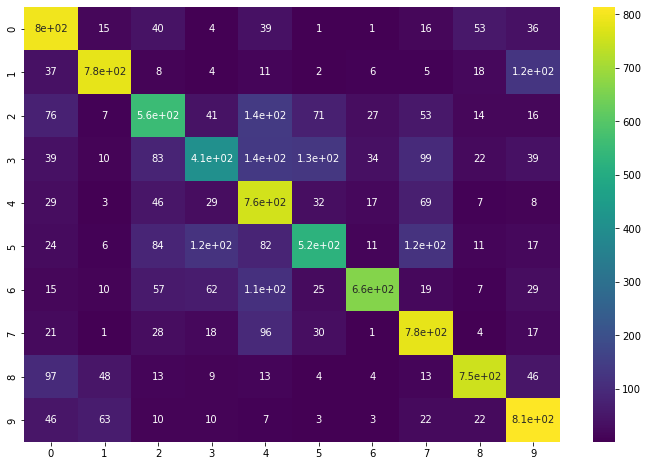

In [123]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='viridis')
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [124]:
my_image = x_test[16]

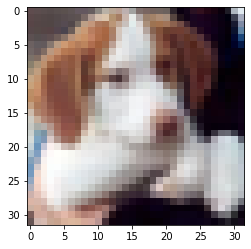

In [125]:
plt.imshow(my_image)

In [126]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

array([5])

5 is *DOG*

https://www.cs.toronto.edu/~kriz/cifar.html

# پاسخ به پرسش های مطرح شده در قسمت ۱

‍1. 
معماری زیر را پیاده سازی کنید و نتیجه را گزارش دهید. برای لایه های کانولوشنی اندازه کرنل را
برابر ۳ بگیرید و پدینگ را در حالت سیم قرار دهید

انجام شد

2. 
در مورد بچ نورمالایزیشن تحقیق کنید و توضیح دهید ،سپس این لایه ها را در جای
مناسب به شبکه اضافه کنید .نتایج را گزارش کنید و نتیجه جدید را با نتایج قبلی مقایسه کنید.

3.
در مورد دراپ اوت تحقیق کنید و توضیح دهید ،سپس این لایه ها را در جای مناسب به شبکه ی
بدست آمده از مرحله قبل اضافه کنید .نتایج را گزارش کنید و نتیجه جدید را با نتایج قبلی مقایسه
کنید.

د راپ اوت به این صورت است که ما میاییم و در هر لایه، به تعدادی مشخصی از نورون هارا به طور رندوم خاموش (یا غیر  فعال) می کنیم، این کار باعث این می شود که از اورفیتینگ جلوگیری کنیم و نتیجه بهتری بگیریم

4. در مورد انواع اپتیمایزر های مختلف که از طریق کراز در دسترس هستند تحقیق کنید و
توضیح دهید .سپس آنها را بر روی شبکه بدست آمده از مرحله قبل اعمال کنید و با یکدیگر مقایسه
کنید و در نهایت بهترین آنها را انتخاب کنید

اپتیمایزر های مختلفی در کراز وجود دارند که ما می توانیم از آنها استفاده کنیم، به طور خلاصه داریم:
    
    

* Adadelta: Optimizer that implements the Adadelta algorithm.
* Adagrad: Optimizer that implements the Adagrad algorithm.
* Adam: Optimizer that implements the Adam algorithm.
* Adamax: Optimizer that implements the Adamax algorithm.
* Ftrl: Optimizer that implements the FTRL algorithm.
* Nadam: Optimizer that implements the NAdam algorithm.
* Optimizer class: Base class for Keras optimizers.
* RMSprop: Optimizer that implements the RMSprop algorithm.
* SGD: Gradient descent (with momentum) optimizer.

من خودم همه رو مقایسه نکردم، ولی تو سرچی که زدم فهمیدم که از 

rmsprop

بیشتر از بقیه تو این مورد استفاده می شه، به خاطر همونم تو این مدلی که استفاده کردم اونو استفاده کردم.

5.
در مورد معیار های ارزیابی اف ۱، دقت، یاداوری تحقیق کنید و نتایج را گزارش دهید .سپس
برای بهترین شبکهی بدست آمده از مرحله قبل این معیارها را محاسبه کنید و مقادیر بدست آمده را
تحلیل کنید.

به این صورت اند که یادآوری، به ما میگه نتایجی که آوردیم، نسبت به کل نتایج چقدر مرتبط داره، و واسه وقتایی که میخوایم کلی نتیجه مرتبط داشته باشیم، حالا شاید با دقت خوبی هم مرتبط نباشن زیاد مهم نیست استفاده می شه.

از طرف دیگه، دقت برای وقتایی که میخوایم ببینیم دقت کارمون چقدر بالاست استفاده میشه.

معیار اف ۱ هم یه نوع مخلوطی از این دوتاست، به صورتی که اگر هر کدومشون صفر باشن، صفر میشه، ولی فقط وقتی که دوتاشون صد باشن صد میشه

## Part 2

1. 

What is data augmentation?\
Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points. 

دیتا آگمنتیشن در اصل یک روش برای درست کردن داده تقلبی هستش، که بتونیم مدلمون رو با داده های بیشتری ترین بدیم، و خب تو تنسورفلو هم یه روش براش هست که میتونیم با میزان کردن پارامتر های مختلفش ازش برای این کار استفاده کنیم

2. 

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the `ImageDataGenerator` to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [134]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [135]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                              )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


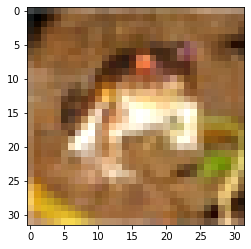

In [138]:
plt.imshow(x_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


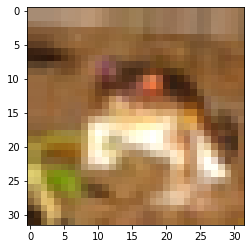

In [139]:
plt.imshow(image_gen.random_transform(x_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


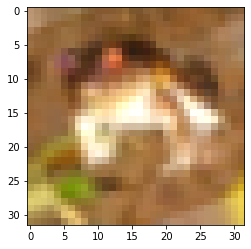

In [140]:
plt.imshow(image_gen.random_transform(x_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


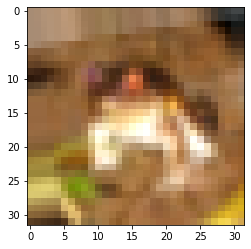

In [141]:
plt.imshow(image_gen.random_transform(x_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


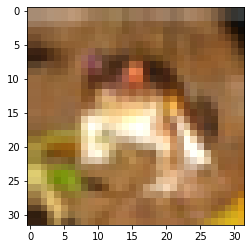

In [142]:
plt.imshow(image_gen.random_transform(x_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


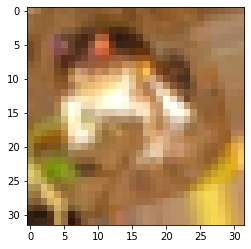

In [143]:
plt.imshow(image_gen.random_transform(x_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


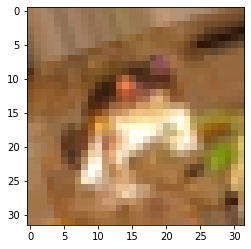

In [144]:
plt.imshow(image_gen.random_transform(x_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


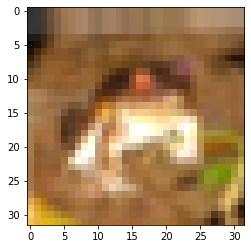

In [145]:
plt.imshow(image_gen.random_transform(x_train[0]))